# Experimental Analysis of String Matching Algorithms 

## Introduction

String matching is a fundamental problem in computer science that consists of finding occurrences of a pattern within a larger text.  
This problem appears in many real-world applications such as text editors, search engines, bioinformatics (DNA sequence analysis), plagiarism detection, and network security.

In this notebook, we perform an **experimental analysis of five classical string matching algorithms**, comparing their execution time as the input size grows.  
The goal is to observe how the **theoretical time complexity** of each algorithm relates to its **practical performance**.

All algorithms are evaluated under the same conditions:
- A single pattern is searched within a text
- The text size increases progressively
- Execution time is measured and averaged over multiple runs

The algorithms analyzed are:
1. Rabin–Karp  
2. Knuth–Morris–Pratt (KMP)  
3. Boyer–Moore  
4. Finite Automaton String Matching  
5. Suffix Automaton  

This analysis allows us to understand the trade-offs between preprocessing cost, search efficiency, and real execution time.


## Rabin–Karp Algorithm

The Rabin–Karp algorithm is based on **hashing**.  
Instead of comparing the pattern with every substring character by character, it compares their hash values.

The algorithm slides a window over the text and updates the hash efficiently using a rolling hash technique.  
If the hash of the window matches the hash of the pattern, a direct comparison is performed to confirm the match.

Rabin–Karp is efficient on average and works well in practice, but in the worst case it can become slow due to hash collisions.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df_rk = pd.read_csv("experiments/rabin_karp_results.csv")
df_rk

,algorithm,text_size,avg_time_seconds
0,Rabin-Karp,1000,0.000459
1,Rabin-Karp,5000,0.002215
2,Rabin-Karp,10000,0.004314
3,Rabin-Karp,50000,0.022524
4,Rabin-Karp,100000,0.044055


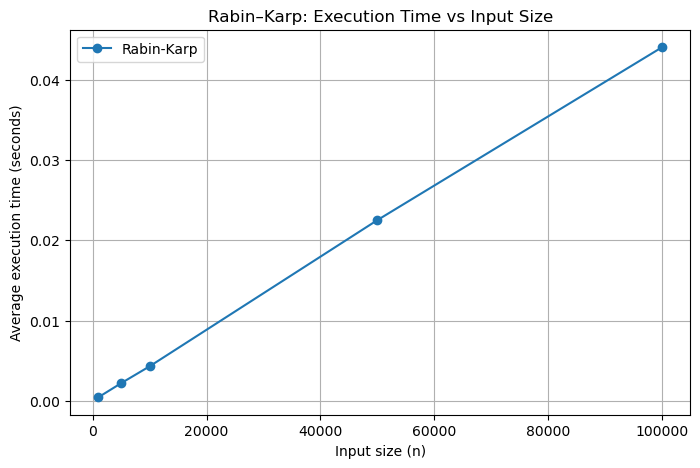

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(
    df_rk["text_size"],
    df_rk["avg_time_seconds"],
    marker="o",
    label="Rabin-Karp"
)

plt.xlabel("Input size (n)")
plt.ylabel("Average execution time (seconds)")
plt.title("Rabin–Karp: Execution Time vs Input Size")
plt.grid(True)
plt.legend()
plt.show()


The execution time of the Rabin–Karp algorithm increases almost linearly as the input size grows.  
This behavior matches the expected **average-case time complexity of O(n + m)**, where the algorithm processes the text using a rolling hash technique.

The smooth and consistent growth shown in the graph indicates that hash collisions were rare during the experiment, which is typical when using random input data.  
This allows Rabin–Karp to perform efficiently in practice for moderate input sizes.

However, it is important to note that despite its good experimental performance, Rabin–Karp still has a theoretical **worst-case complexity of O(n·m)**, which may occur when many hash collisions happen.  
In real-world scenarios, this makes Rabin–Karp a fast but not strictly guaranteed linear-time algorithm.


## Knuth–Morris–Pratt (KMP) Algorithm

The KMP algorithm improves naive string matching by avoiding unnecessary re-comparisons.  
It preprocesses the pattern to build a prefix table (LPS array), which indicates how much the pattern can be shifted when a mismatch occurs.

During the search phase, KMP never moves backwards in the text, guaranteeing linear time complexity.  
This makes KMP a stable and predictable algorithm, especially useful when worst-case performance matters.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df_kmp = pd.read_csv("experiments/kmp_results.csv")
df_kmp



,algorithm,text_size,avg_time_seconds
0,KMP,1000,0.000209
1,KMP,5000,0.001045
2,KMP,10000,0.002065
3,KMP,50000,0.010454
4,KMP,100000,0.021691


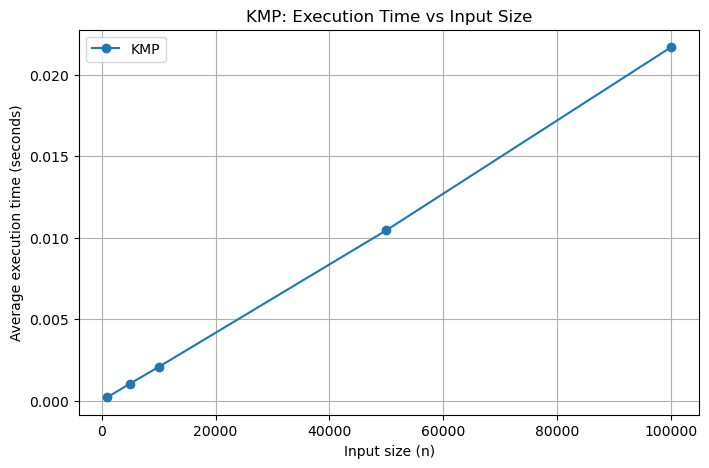

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(
    df_kmp["text_size"],
    df_kmp["avg_time_seconds"],
    marker="o",
    label="KMP"
)

plt.xlabel("Input size (n)")
plt.ylabel("Average execution time (seconds)")
plt.title("KMP: Execution Time vs Input Size")
plt.grid(True)
plt.legend()
plt.show()


The graph shows a clear and stable linear increase in execution time as the input size grows.  
This behavior is consistent with the theoretical time complexity of **O(n + m)** guaranteed by the KMP algorithm.

Unlike other algorithms that may suffer from performance degradation in specific cases, KMP avoids unnecessary comparisons by using its prefix (LPS) table.  
This results in predictable and uniform performance, which is reflected in the smooth curve shown in the graph.

Overall, the experimental results confirm that KMP provides reliable linear-time behavior, making it a strong choice when worst-case performance guarantees are required.



## Boyer–Moore Algorithm

The Boyer–Moore algorithm compares the pattern with the text **from right to left**, instead of left to right.  
When a mismatch occurs, it uses heuristic rules to skip large portions of the text.

Because of these jumps, Boyer–Moore often performs very well in practice and can be faster than linear-time algorithms on random text.  
However, its worst-case time complexity can still be quadratic.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df_bm = pd.read_csv("experiments/boyer_moore_results.csv")
df_bm

,algorithm,text_size,avg_time_seconds
0,Boyer-Moore,1000,0.000113
1,Boyer-Moore,5000,0.000494
2,Boyer-Moore,10000,0.000963
3,Boyer-Moore,50000,0.004833
4,Boyer-Moore,100000,0.009898


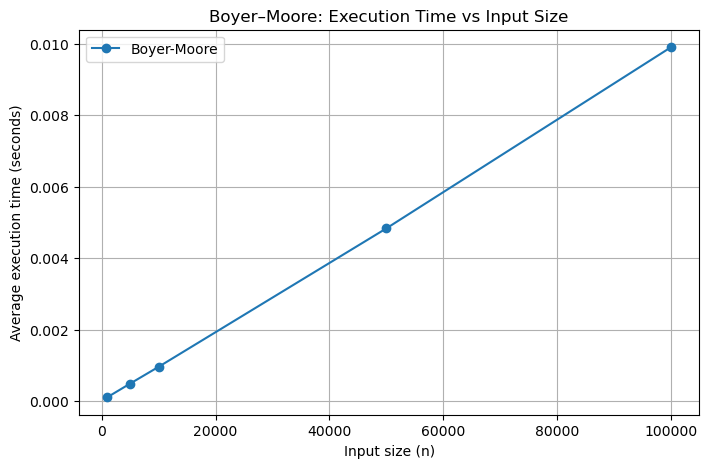

In [18]:

plt.figure(figsize=(8, 5))
plt.plot(
    df_bm["text_size"],
    df_bm["avg_time_seconds"],
    marker="o",
    label="Boyer-Moore"
)

plt.xlabel("Input size (n)")
plt.ylabel("Average execution time (seconds)")
plt.title("Boyer–Moore: Execution Time vs Input Size")
plt.grid(True)
plt.legend()
plt.show()


The execution time of the Boyer–Moore algorithm increases as the input size grows, but it does so with a noticeably smaller slope compared to other algorithms.  
This indicates that Boyer–Moore performs fewer character comparisons due to its ability to skip sections of the text.

By comparing the pattern from right to left and applying heuristic rules, Boyer–Moore often achieves better practical performance, especially on random text.  
Although its theoretical worst-case complexity is **O(n·m)**, the experimental results show that it behaves efficiently under typical conditions.

These results highlight why Boyer–Moore is often one of the fastest string matching algorithms in real-world applications.


## Finite Automaton String Matching

This approach builds a **deterministic finite automaton (DFA)** from the pattern.  
Each state represents how much of the pattern has been matched so far, and transitions define how the automaton reacts to incoming characters.

Once the automaton is built, the text is scanned in a single pass, updating the state at each character.  
The search phase is linear, but the preprocessing step can be more expensive due to the construction of the transition table.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df_fa = pd.read_csv("experiments/finite_automaton_results.csv")
df_fa

,algorithm,text_size,avg_time_seconds
0,Finite Automaton,1000,0.000375
1,Finite Automaton,5000,0.000952
2,Finite Automaton,10000,0.001659
3,Finite Automaton,50000,0.007642
4,Finite Automaton,100000,0.014596


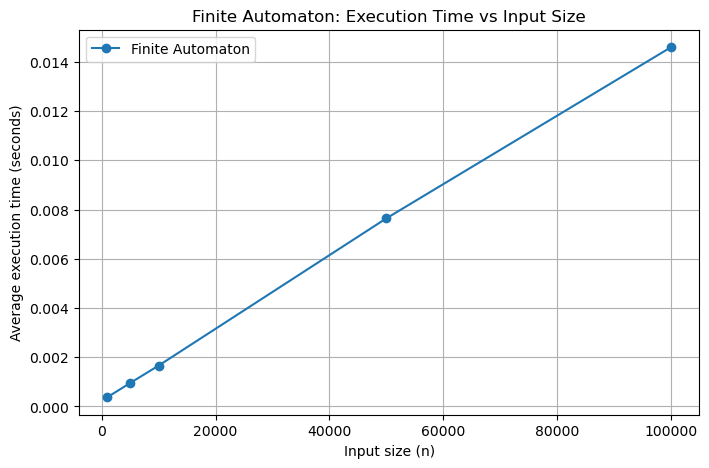

In [21]:

plt.figure(figsize=(8, 5))
plt.plot(
    df_fa["text_size"],
    df_fa["avg_time_seconds"],
    marker="o",
    label="Finite Automaton"
)

plt.xlabel("Input size (n)")
plt.ylabel("Average execution time (seconds)")
plt.title("Finite Automaton: Execution Time vs Input Size")
plt.grid(True)
plt.legend()
plt.show()


The execution time of the Finite Automaton approach grows linearly with the input size, which is consistent with its linear-time search phase.  
Once the automaton is built, the text is scanned in a single pass, leading to stable and predictable performance.

Compared to other algorithms, the Finite Automaton shows a slightly higher execution time due to the overhead introduced by state transitions.  
However, this overhead remains constant, and the overall behavior still follows a linear trend.

These results confirm that automaton-based string matching provides reliable performance, especially in scenarios where predictable execution time is preferred over aggressive skipping strategies.

## Suffix Automaton

A suffix automaton is a compact automaton that represents **all substrings of a given text**.  
It is built once from the text and then allows very fast pattern queries.

After construction, checking whether a pattern exists in the text is done by following transitions in the automaton.  
While the search is very efficient, the construction requires additional memory and preprocessing time compared to other algorithms.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df_sa = pd.read_csv("experiments/suffix_automaton_results.csv")
df_sa

,algorithm,text_size,avg_time_seconds
0,Suffix Automaton,1000,0.000006
1,Suffix Automaton,5000,0.000008
2,Suffix Automaton,10000,0.000012
3,Suffix Automaton,50000,0.000021
4,Suffix Automaton,100000,0.000023


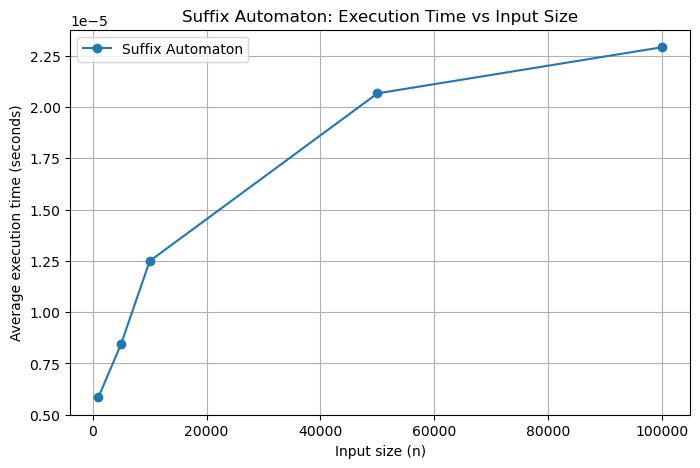

In [23]:


plt.figure(figsize=(8, 5))
plt.plot(
    df_sa["text_size"],
    df_sa["avg_time_seconds"],
    marker="o",
    label="Suffix Automaton"
)

plt.xlabel("Input size (n)")
plt.ylabel("Average execution time (seconds)")
plt.title("Suffix Automaton: Execution Time vs Input Size")
plt.grid(True)
plt.legend()
plt.show()


The execution time of the Suffix Automaton remains extremely low and grows very slowly as the input size increases.  
This behavior reflects the fact that, once the automaton is built, pattern searches are performed in **O(m)** time, where *m* is the pattern length, independent of the text size.

The slight increase observed in the graph is mainly due to constant overhead related to state transitions and Python execution costs, rather than the length of the input text itself.  
Compared to the other algorithms, the Suffix Automaton provides the fastest query performance during the search phase.

These results highlight the main trade-off of this approach: while the search operation is highly efficient, it requires a preprocessing step and additional memory to construct the automaton.

## Final Comparison and Conclusions


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("experiments/all_algorithms_results.csv")
df


,algorithm,text_size,time
0,Boyer-Moore,1000,0.000102
1,Boyer-Moore,5000,0.000492
2,Boyer-Moore,10000,0.000958
3,Boyer-Moore,50000,0.006002
4,Boyer-Moore,100000,0.009831
5,Finite Automaton,1000,0.000399
6,Finite Automaton,5000,0.000995
7,Finite Automaton,10000,0.001731
8,Finite Automaton,50000,0.010497
9,Finite Automaton,100000,0.015189


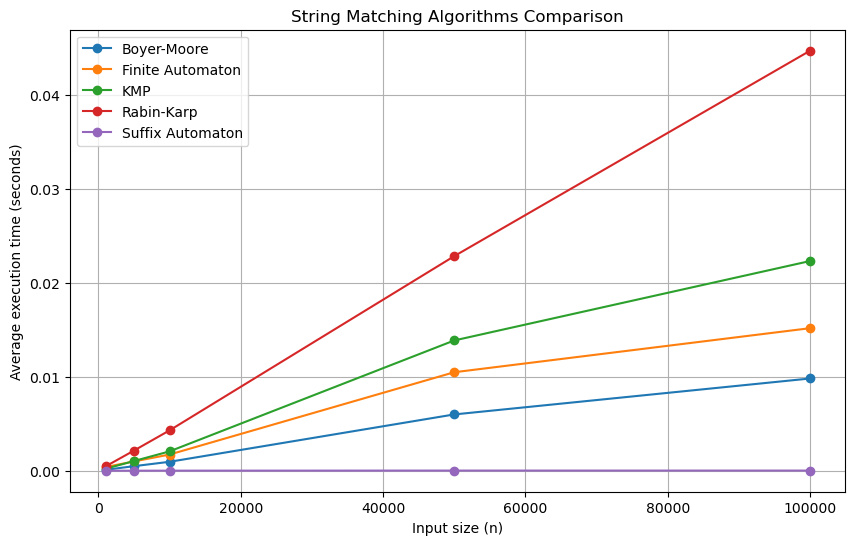

In [25]:
plt.figure(figsize=(10, 6))

for algo in df["algorithm"].unique():
    subset = df[df["algorithm"] == algo]
    plt.plot(
        subset["text_size"],
        subset["time"],
        marker="o",
        label=algo
    )

plt.xlabel("Input size (n)")
plt.ylabel("Average execution time (seconds)")
plt.title("String Matching Algorithms Comparison")
plt.grid(True)
plt.legend()
plt.show()



The comparative graph shows clear performance differences among the five string matching algorithms when evaluated under the same experimental conditions.

### Overall Performance

The **Suffix Automaton** is the fastest algorithm in the search phase.  
Its execution time remains almost constant as the input size grows, since pattern matching is performed in **O(m)** time after the automaton is built.  
However, this result must be interpreted carefully: the Suffix Automaton only determines whether a pattern exists in the text, and does not report the positions of occurrences.  
In addition, it requires a preprocessing step and additional memory to build the automaton.

Among the algorithms that return match positions, **Boyer–Moore** shows the best practical performance.  
Its ability to compare characters from right to left and skip large portions of the text allows it to outperform linear-time algorithms in typical cases.

**KMP** and the **Finite Automaton** exhibit stable and predictable linear behavior.  
Both guarantee linear-time performance and avoid unnecessary re-comparisons, but they introduce additional overhead due to preprocessing (LPS table or transition table), which results in slightly higher execution times compared to Boyer–Moore.

The **Rabin–Karp** algorithm is the slowest in this experiment.  
Although it performs well on average, its reliance on hashing introduces extra overhead, and hash comparisons do not allow it to skip large sections of the text.  
This leads to higher execution times compared to the other approaches.

### Summary

- **Fastest search:** Suffix Automaton (search phase only)
- **Best practical performance with positions:** Boyer–Moore
- **Most stable and predictable:** KMP and Finite Automaton
- **Slowest in practice:** Rabin–Karp

### Final Remarks

This experimental analysis highlights that theoretical time complexity alone is not sufficient to predict real-world performance.  
Constant factors, preprocessing costs, memory usage, and the type of output produced (existence vs. positions) play a crucial role in practical algorithm selection.

Choosing the appropriate string matching algorithm depends on the specific requirements of the application, such as performance guarantees, memory constraints, and the type of results needed.
